# Traffic accidents in Saudi Arabia during 1939 Hijri

The causes of traffic accidents in Saudi Arabia have become one of the main problems the kingdom is dealing with. with this project we try to find out the following:

- What is the total number of accidents per month?
- What is the percentage of children that are involved in these accidents per month?
- What is the the percentage of children involved for each region during the whole year?
- Comparing the largest regions in the kingdom of Saudi Arabia, where is the highest percentage of children involvement into traffic accidents?



In [384]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
%matplotlib inline

In [385]:
# importing data, data received from my mentor, and is to be found in Saudi open data portal. 
# read all excel sheets and combine them in one dataframe
# add a column with sheet's name, which is the region name
workbook = pd.ExcelFile('traffic-accident-statistics-as-of-1439-h.xls')
sheets = workbook.sheet_names
df = pd.concat([pd.read_excel(workbook, sheet_name=s)
                .assign(region=s) for s in sheets])


In [386]:
# resetting the index
df.reset_index(drop=True,inplace=True)

In [387]:
# data's headers are in arabic, I'm not going to use the data concerning the age groups only
df.head()

,الشهر,حادث تلفيات,حادث اصابات,حادث وفيات,مجموع عدد الحوادث,السبت,الا حد,الاثنين,الثلاثاء,الا ربعاء,...,عدم التقيد بالاشارة,السرعة الزائدة,السائق تحت تأثير مخدر,اخرى.1,مجموع الحوادث حسب سبب الحادث,عدد المصابين,عدد المتوفين (القتلى),سليم,مجموع الأشخاص المشمولين بالحوادث,region
0,محرم,5047,277,75,5399,919,781,625,814,702,...,1208,1304,0,0,5399,393,100,12435,12928,الرياض
1,صفر,5941,255,78,6274,1427,1407,1434,857,421,...,739,997,0,0,6274,433,98,9110,9641,الرياض
2,ربيع أول,7808,271,87,8166,1209,1435,1121,1122,1140,...,1380,2444,0,0,8166,455,105,15385,15945,الرياض
3,ربيع ثانى,7821,266,79,8166,1368,1436,1094,1054,1085,...,1366,1992,0,0,8166,427,91,15181,15699,الرياض
4,جمادى أول,7923,237,81,8241,1410,1298,1014,1088,1110,...,1426,2228,0,0,8241,358,96,15437,15891,الرياض


In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 75 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   الشهر                                              222 non-null    object 
 1   حادث تلفيات                                        223 non-null    object 
 2   حادث اصابات                                        222 non-null    object 
 3   حادث وفيات                                         222 non-null    object 
 4    مجموع عدد الحوادث                                 222 non-null    object 
 5   السبت                                              222 non-null    object 
 6   الا حد                                             222 non-null    object 
 7   الاثنين                                            222 non-null    object 
 8   الثلاثاء                                           222 non-null    object 
 9   الا ربعاء 

In [389]:
# rename some columns
df.rename(columns={-18:"18-","الشهر" :"month"},inplace=True)

In [390]:
# drop a second month column that is unusefull, is a duplicate and is almost empty
df.drop(columns=["الشهر.1"], axis=1, inplace=True)

In [391]:
# display all unique months:
df["month"].unique()

array(['محرم', 'صفر', 'ربيع أول', 'ربيع ثانى', 'جمادى أول', 'جمادى ثانى',
       'رجب', 'شعبان', 'رمضان', 'شوال', 'ذى القعدة', 'ذى الحجة',
       'المجموع', nan, 'الشهر', 'صـفـر'], dtype=object)

In [392]:
# unify month names, rename Safar month name
df["month"].replace({"صـفـر": "صفر"}, inplace=True)

In [393]:
#values to delete
values = ["المجموع", "الشهر"]

#drop rows that contain any value in the list
df = df[df.month.isin(values) == False]

In [394]:
df.month.unique()

array(['محرم', 'صفر', 'ربيع أول', 'ربيع ثانى', 'جمادى أول', 'جمادى ثانى',
       'رجب', 'شعبان', 'رمضان', 'شوال', 'ذى القعدة', 'ذى الحجة', nan],
      dtype=object)

In [395]:
df.shape

(208, 74)

In [396]:
# renaming month names (in Hijri, islamic calender) to english spelled names

df["month"].replace({'محرم': 'Muharram',
 'صفر': 'Safar',
 'ربيع أول': 'Rabi al-awwal',
 'ربيع ثانى': 'Rabi al-thani',
 'جمادى أول': 'Jumada al-awwal',
 'جمادى ثانى': 'Jumada al-thani',
 'رجب': 'Rajab',
 'شعبان': 'Shaban',
 'رمضان': 'Ramadan',
 'شوال': 'Shawwal',
 'ذى القعدة': 'Dhul Qadah',
'ذى الحجة': 'Dhul Hijjah'}, inplace=True)

In [397]:
# replacing region names with english words

df["region"].replace({'الرياض': 'Riyadh',
 'المدينه المنوره': 'Madinah',
 'الشرقيه': 'Eastern',
 'الحدود الشماليه': 'North',
 'تبوك': 'Tabuk',
 'الجوف': 'Jouf',
 'حائل': 'Hail',
 'نجران': 'Najran',
 'القصيم': 'Qassim',
 'الـــبـا حــه': 'Baha',
 'عسير': 'Asseer',
'جازان': 'Jazan',
 'جده': 'Jedda',
 'الطائف': 'Taif',
 'العاصمه': 'Assema',
 'القريات': 'Quraiat',
 'المجموع الكلي لعام 1439': 'Total in 1939'
}, inplace=True)

In [398]:
# print df numer of rows and columns
df.shape

(208, 74)

In [399]:
# extract the age columns from the data & read their info

age_df=df[["month","region","18-","18+","30+","40+","50+"]]
age_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 0 to 224
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   month   204 non-null    object 
 1   region  208 non-null    object 
 2   18-     204 non-null    float64
 3   18+     204 non-null    object 
 4   30+     204 non-null    object 
 5   40+     204 non-null    object 
 6   50+     204 non-null    object 
dtypes: float64(1), object(6)
memory usage: 13.0+ KB


In [400]:
# display and drop rows with nan values
age_df.isna().sum()

month     4
region    0
18-       4
18+       4
30+       4
40+       4
50+       4
dtype: int64

In [401]:
age_df.dropna(inplace=True)

C:\Users\fatsam\AppData\Local\Temp/ipykernel_16668/3974699517.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [402]:
age_df.isna().sum()

month     0
region    0
18-       0
18+       0
30+       0
40+       0
50+       0
dtype: int64

In [403]:
# convert number columns to float dtype
age_df[["18-","18+","30+","40+","50+"]]= age_df[["18-","18+","30+","40+","50+"]].astype('float')
#age_df[["month","region"]]=age_df[["month","region"]].astype('str')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [404]:
age_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 0 to 224
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   month   204 non-null    object 
 1   region  204 non-null    object 
 2   18-     204 non-null    float64
 3   18+     204 non-null    float64
 4   30+     204 non-null    float64
 5   40+     204 non-null    float64
 6   50+     204 non-null    float64
dtypes: float64(5), object(2)
memory usage: 12.8+ KB


In [405]:
# all months in month column
age_df.month.unique()

array(['Muharram', 'Safar', 'Rabi al-awwal', 'Rabi al-thani',
       'Jumada al-awwal', 'Jumada al-thani', 'Rajab', 'Shaban', 'Ramadan',
       'Shawwal', 'Dhul Qadah', 'Dhul Hijjah'], dtype=object)

In [406]:
# region column unique values
age_df.region.unique()

array(['Riyadh', 'Madinah', 'Eastern', 'North', 'Tabuk', 'Jouf', 'Hail',
       'Najran', 'Qassim', 'Baha', 'Asseer', 'Jazan', 'Jedda', 'Taif',
       'Assema', 'Quraiat', 'Total in 1939'], dtype=object)

In [407]:
#drop 'Total in 1939' rows
age_df.drop(age_df.index[age_df['region'] == 'Total in 1939'], inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [408]:
age_df.shape

(192, 7)

In [409]:
# display data statistics
age_df.describe()

,18-,18+,30+,40+,50+
count,192.000000,192.000000,192.000000,192.000000,192.000000
mean,363.171875,1178.427083,929.578125,552.390625,280.432292
std,596.693644,1232.603432,1084.625949,718.911990,399.607564
min,2.000000,47.000000,11.000000,0.000000,4.000000
25%,61.000000,344.250000,161.500000,88.000000,51.000000
50%,152.500000,800.000000,513.000000,285.500000,96.000000
75%,389.250000,1526.250000,1132.500000,779.500000,294.250000
max,2916.000000,4880.000000,4920.000000,3841.000000,2015.000000


In [410]:
age_df.groupby(["region"]).get_group("Eastern")

,month,region,18-,18+,30+,40+,50+
26,Muharram,Eastern,1148.0,4601.0,3545.0,1357.0,448.0
27,Safar,Eastern,989.0,4652.0,3705.0,1310.0,518.0
28,Rabi al-awwal,Eastern,925.0,4586.0,3817.0,1332.0,529.0
29,Rabi al-thani,Eastern,948.0,4667.0,3901.0,1384.0,486.0
30,Jumada al-awwal,Eastern,852.0,4366.0,3805.0,1397.0,465.0
31,Jumada al-thani,Eastern,206.0,1773.0,1361.0,847.0,134.0
32,Rajab,Eastern,183.0,1657.0,1256.0,806.0,112.0
33,Shaban,Eastern,186.0,1612.0,1325.0,822.0,122.0
34,Ramadan,Eastern,163.0,1422.0,1264.0,706.0,361.0
35,Shawwal,Eastern,160.0,1599.0,1263.0,771.0,127.0


In [411]:
age_df.groupby(["region"]).get_group("Riyadh")

,month,region,18-,18+,30+,40+,50+
0,Muharram,Riyadh,2417.0,4583.0,4390.0,1264.0,274.0
1,Safar,Riyadh,1843.0,2281.0,2452.0,2053.0,1012.0
2,Rabi al-awwal,Riyadh,2722.0,3833.0,3697.0,3841.0,1852.0
3,Rabi al-thani,Riyadh,2855.0,3796.0,3541.0,3280.0,1709.0
4,Jumada al-awwal,Riyadh,2844.0,3862.0,3623.0,3841.0,1721.0
5,Jumada al-thani,Riyadh,2386.0,3864.0,3129.0,3285.0,1215.0
6,Rajab,Riyadh,2916.0,3605.0,3411.0,3629.0,1185.0
7,Shaban,Riyadh,2791.0,4633.0,4920.0,1933.0,641.0
8,Ramadan,Riyadh,2405.0,3791.0,3112.0,2150.0,1301.0
9,Shawwal,Riyadh,1914.0,2259.0,2371.0,1991.0,1882.0


## Total percentage of accidents where kids are involved per month in 1439 H

In [412]:
# add a column for Total accidents of all age groups

age_df['Total']= age_df.iloc[:, -5:-1].sum(axis=1)

C:\Users\fatsam\AppData\Local\Temp/ipykernel_16668/2161636200.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [413]:
age_df.head()

,month,region,18-,18+,30+,40+,50+,Total
0,Muharram,Riyadh,2417.0,4583.0,4390.0,1264.0,274.0,12654.0
1,Safar,Riyadh,1843.0,2281.0,2452.0,2053.0,1012.0,8629.0
2,Rabi al-awwal,Riyadh,2722.0,3833.0,3697.0,3841.0,1852.0,14093.0
3,Rabi al-thani,Riyadh,2855.0,3796.0,3541.0,3280.0,1709.0,13472.0
4,Jumada al-awwal,Riyadh,2844.0,3862.0,3623.0,3841.0,1721.0,14170.0


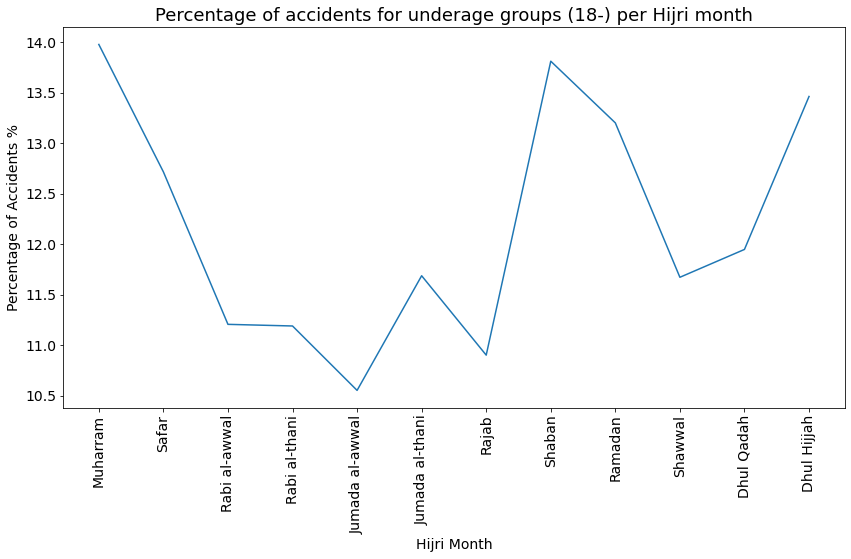

In [415]:
fig, ax = plt.subplots(figsize=(14,7))
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.ylabel('Percentage of Accidents %', fontsize=14)
plt.xlabel('Hijri Month', fontsize=14)
plt.title('Percentage of accidents for underage groups (18-) per Hijri month', fontsize=18)
tot = age_df.groupby(["month"])['Total'].sum()
ax = sns.lineplot(x=age_df["month"].unique(), y=age_df.groupby(["month"])['18-'].sum()*100/(tot),
                 )

plt.show()

## Total number of accidents in Eastern and Riyadh regions for all age groups during 1439 H

Text(0.5, 0, 'Month in Hijri')

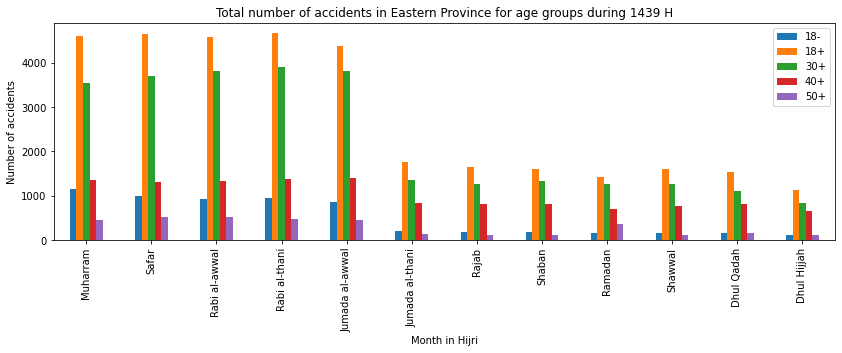

In [416]:
fig, axs = plt.subplots(figsize=(14, 4))
age_df_eastern = age_df.drop('Total', axis=1)
age_df_eastern.groupby(['region']).get_group("Eastern").plot.bar(ax=axs,x="month")
axs.set_title("Total number of accidents in Eastern Province for age groups during 1439 H")
axs.set_ylabel("Number of accidents")
axs.set_xlabel("Month in Hijri")

Text(0.5, 0, 'Month in Hijri')

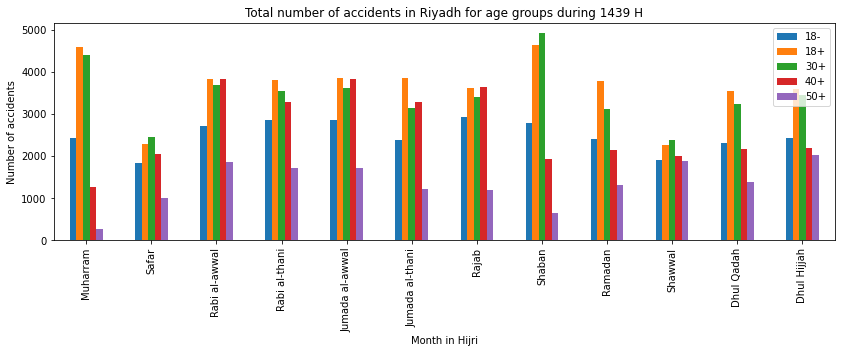

In [417]:
fig, axs = plt.subplots(figsize=(14, 4))
age_df_riyadh = age_df.drop('Total', axis=1)
age_df_riyadh.groupby(['region']).get_group("Riyadh").plot.bar(ax=axs,x="month")
axs.set_title("Total number of accidents in Riyadh for age groups during 1439 H")
axs.set_ylabel("Number of accidents")
axs.set_xlabel("Month in Hijri")

Text(0.5, 0, 'Month in Hijri')

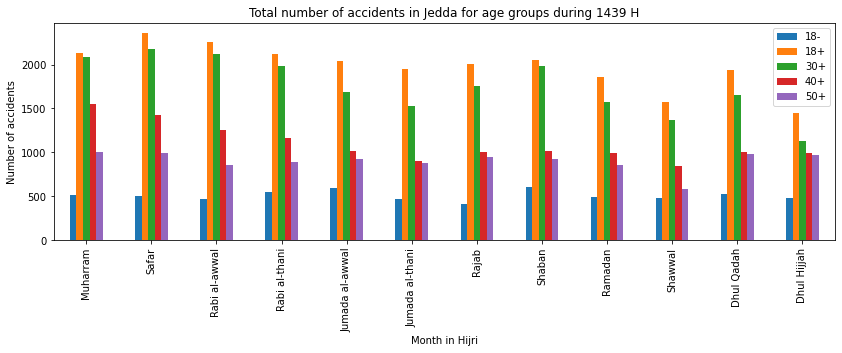

In [418]:
fig, axs = plt.subplots(figsize=(14, 4))
age_df_jedda = age_df.drop('Total', axis=1)
age_df_jedda.groupby(['region']).get_group("Jedda").plot.bar(ax=axs,x="month")
axs.set_title("Total number of accidents in Jedda for age groups during 1439 H")
axs.set_ylabel("Number of accidents")
axs.set_xlabel("Month in Hijri")

In [419]:
riyadh_underage = age_df_riyadh.groupby(['region']).get_group("Riyadh")["18-"]*100/age_df.groupby(['region']).get_group("Riyadh")["Total"]
eastern_underage = age_df_eastern.groupby(['region']).get_group("Eastern")["18-"]*100/age_df.groupby(['region']).get_group("Eastern")["Total"]
jedda_underage = age_df_eastern.groupby(['region']).get_group("Jedda")["18-"]*100/age_df.groupby(['region']).get_group("Jedda")["Total"]


In [420]:
import plotly.express as px

fig = px.line(age_df, x=age_df["month"].unique(), y=[riyadh_underage,jedda_underage, eastern_underage],
              title="Kids involvement into traffic accidents in the biggest regions in KSA",
              labels={
                     "x": "Month in Hijri",
                     "value": "Percentage of kids in accidents"})
fig.update_layout(
    legend_title="Regions")

newnames = {

   'wide_variable_0': 'Riyadh',
    'wide_variable_1': 'Jedda',
    'wide_variable_2': 'Eastern',
}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
   legendgroup = newnames[t.name],
   hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
))

fig.show()

# Percentage of accidents where kids are involved per region during 1439 H

Text(0.5, 0, 'Region')

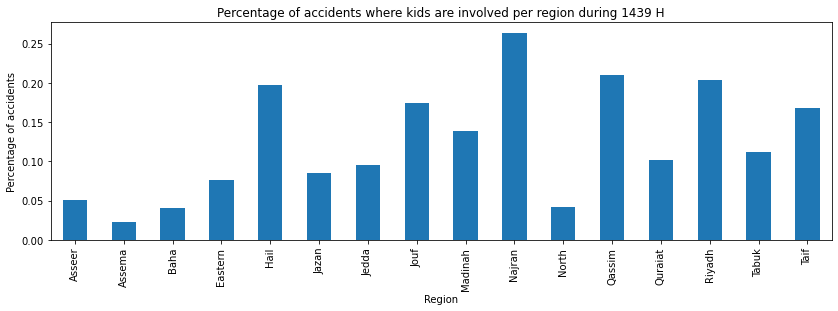

In [421]:
fig, axs = plt.subplots(figsize=(14, 4))
underage = (age_df.groupby(['region'])["18-"].sum()/age_df.groupby(['region'])["Total"].sum())
underage.plot.bar(ax=axs,x="region")
axs.set_title("Percentage of accidents where kids are involved per region during 1439 H")
axs.set_ylabel("Percentage of accidents")
axs.set_xlabel("Region")

Text(0.5, 0, 'Month in Hijri')

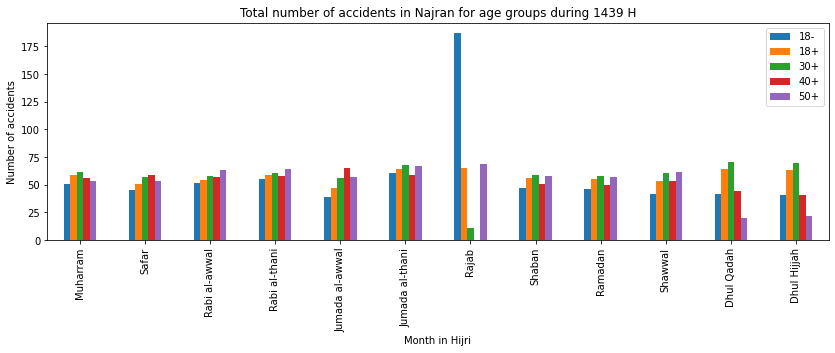

In [422]:
fig, axs = plt.subplots(figsize=(14, 4))
age_df_najran = age_df.drop('Total', axis=1)
age_df_najran.groupby(['region']).get_group("Najran").plot.bar(ax=axs,x="month")
axs.set_title("Total number of accidents in Najran for age groups during 1439 H")
axs.set_ylabel("Number of accidents")
axs.set_xlabel("Month in Hijri")

# Total accidents in 1439 H

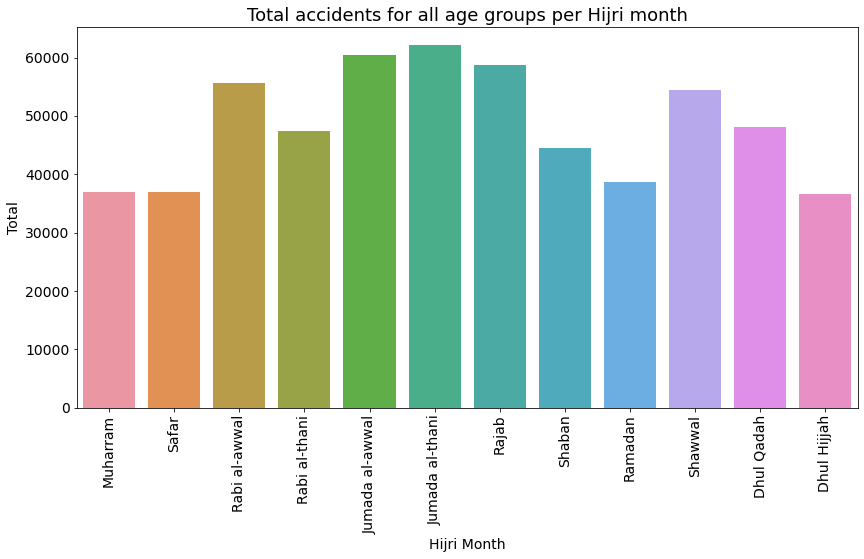

In [423]:

fig, ax = plt.subplots(figsize=(14,7))
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.ylabel('Total Accidents', fontsize=14)
plt.xlabel('Hijri Month', fontsize=14)
plt.title('Total accidents for all age groups per Hijri month', fontsize=18)
ax = sns.barplot(x=age_df["month"].unique(), y=age_df.groupby(["month"])['Total'].sum(),
                 order=['Muharram', 'Safar', 'Rabi al-awwal', 'Rabi al-thani',
       'Jumada al-awwal', 'Jumada al-thani', 'Rajab', 'Shaban', 'Ramadan',
       'Shawwal', 'Dhul Qadah', 'Dhul Hijjah'])

plt.show()